<a href="https://colab.research.google.com/github/valogonor/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
import numpy as np
df_numeric = df.select_dtypes(include=[np.number])
housing = df_numeric.drop(columns='Id')
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [3]:
# Filling all the NaN values with the column's median value
housing.LotFrontage = housing.LotFrontage.fillna(value=69)
housing.MasVnrArea = housing.MasVnrArea.fillna(value=0)
housing.GarageYrBlt = housing.GarageYrBlt.fillna(value=1980)
housing.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

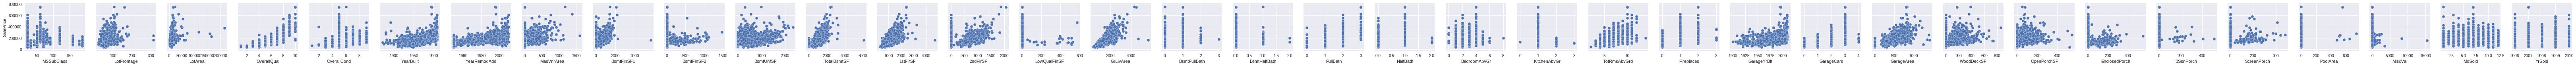

In [4]:
import seaborn as sns
x_columns = housing.columns.drop('SalePrice')
sns.pairplot(housing, x_vars=x_columns, y_vars=['SalePrice']);

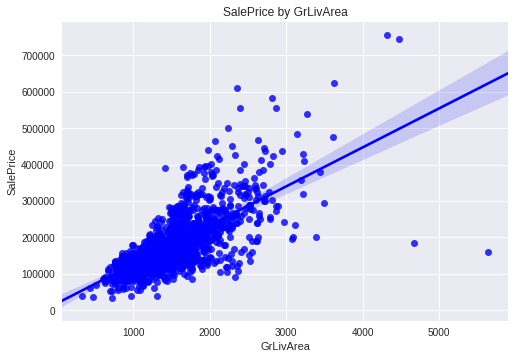

In [5]:
fig = sns.regplot(housing.GrLivArea, housing.SalePrice, color='blue').set_title('SalePrice by GrLivArea')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
X = housing[['OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
y = housing.SalePrice

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [7]:
import statsmodels.api as sm
# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     573.5
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:11:28   Log-Likelihood:                -17503.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1451   BIC:                         3.507e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.02e+05   6021.593    -16.934   

The rounded standard errors for these variables are 1095, 4, 22, 22, 21, 2527, 1144, and 6. The p-values are 0, 0, 0, 0, 0, .5, .2, .7, and 0. The p-values represent the likelyhood that the null hypothesis, that the variable has no effect on the sale price, is true. In this case, we cannot reject the null hypothesis with the variables GrLivArea, FullBath, and TotRmsAbvGrd.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [8]:
from scipy import stats
# # Lets remove outliers 

print(housing.shape)

housing = housing[(np.abs(stats.zscore(housing)) < 3).all(axis=1)]

print(housing.shape)

(1460, 37)
(1015, 37)


In [9]:
X = housing[['OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
y = housing.SalePrice

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     630.4
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:11:28   Log-Likelihood:                -11754.
No. Observations:                1015   AIC:                         2.353e+04
Df Residuals:                    1006   BIC:                         2.357e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.891e+04   5035.191    -15.672   

Some of the coefficients have changed. The ones that have changed the most are 1stFlrSF, 2ndFlrSF, GrLivArea, FullBath, and TotRmsAbvGrd.

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [10]:
housing['LnSalePrice'] = np.log(df['SalePrice'])
X = housing[['OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
y = housing.LnSalePrice

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            LnSalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     629.4
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:11:28   Log-Likelihood:                 486.68
No. Observations:                1015   AIC:                            -955.4
Df Residuals:                    1006   BIC:                            -911.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5440      0.029    361.887   

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea'],
      dtype='object') 


[38.05538015321767, 2.4275626867999804, 3.799747569926818, 5239.799374287866, 7987.748580111166, 8859.311548053092, 2.1924724884746722, 3.2304064545822, 1.6895713201568507]


In [12]:
X = housing[['OverallQual','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
y = housing.LnSalePrice

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            LnSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     885.5
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:11:28   Log-Likelihood:                 431.62
No. Observations:                1015   AIC:                            -851.2
Df Residuals:                    1009   BIC:                            -821.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.4343      0.028    378.127   

The standard errors did not change much after eliminating the variables with high VIF values. The coefficients went up for the remaining variables. Yes, the coefficients seem to have an interpretation that matches my intuition.

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [13]:
X = housing[['OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
X.corr()

,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
OverallQual,1.000000,0.524640,0.454096,0.287150,0.621254,0.649309,0.473326,0.563529
TotalBsmtSF,0.524640,1.000000,0.831668,-0.289506,0.363053,0.361612,0.242943,0.483975
1stFlrSF,0.454096,0.831668,1.000000,-0.335559,0.448795,0.363533,0.323214,0.473647
2ndFlrSF,0.287150,-0.289506,-0.335559,1.000000,0.691163,0.407691,0.608537,0.129627
GrLivArea,0.621254,0.363053,0.448795,0.691163,1.000000,0.666321,0.824423,0.486768
FullBath,0.649309,0.361612,0.363533,0.407691,0.666321,1.000000,0.529860,0.493073
TotRmsAbvGrd,0.473326,0.242943,0.323214,0.608537,0.824423,0.529860,1.000000,0.363998
GarageArea,0.563529,0.483975,0.473647,0.129627,0.486768,0.493073,0.363998,1.000000


2ndFlrSF and GrLivArea are highly correlated.

## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
# See 2.1
# The standard errors were already close to 0 before removing high VIF variables, and excluding those variables had little to no effect on the standard errors. However, the
# p-values are now all statistically significant.

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [15]:
# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

# Log-Linear Regression

X = housing[['OverallQual','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
y = housing.LnSalePrice

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            LnSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     723.7
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:11:28   Log-Likelihood:                 431.62
No. Observations:                1015   AIC:                            -851.2
Df Residuals:                    1009   BIC:                            -821.7
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.4343      0.030    347.232   

The standard errors are just as low as they were before.

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

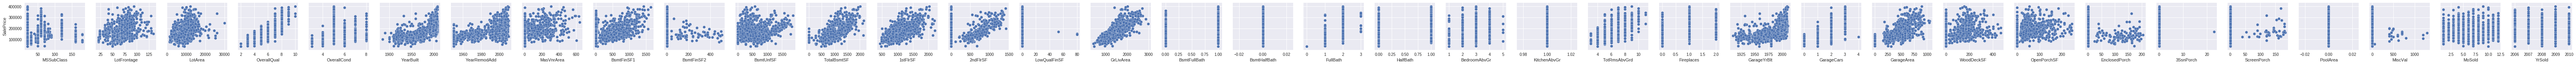

In [16]:
# Generate a list of column headers not including price
x_columns = housing.columns.drop(['SalePrice', 'LnSalePrice'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(housing, y_vars=['SalePrice'], x_vars=x_columns)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

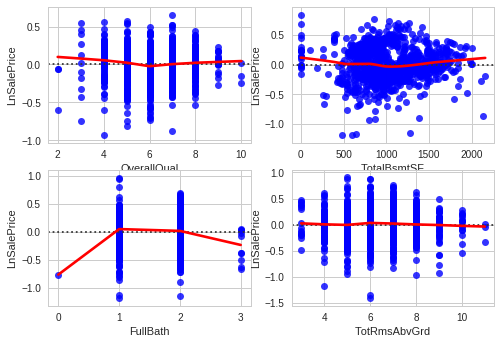

In [17]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(X['OverallQual'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['TotalBsmtSF'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['FullBath'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['TotRmsAbvGrd'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})
plt.show()

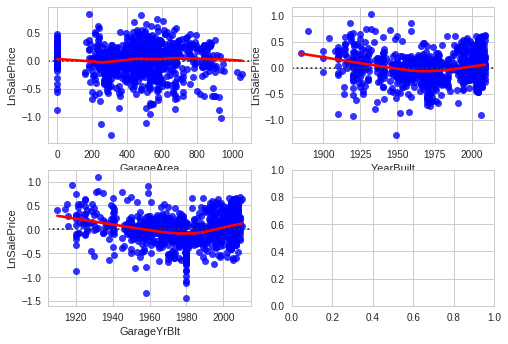

In [18]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(X['GarageArea'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(housing['YearBuilt'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(housing['GarageYrBlt'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'});

FullBath, YearBuilt, and GarageYrBlt are candidates for polynomial features

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
housing['FullBathSquared'] = housing['FullBath']**2
housing['YearBuiltSquared'] = housing['YearBuilt']**2
housing['GarageYrBltSquared'] = housing['GarageYrBlt']**2

In [21]:
X = housing[['OverallQual','TotalBsmtSF', 'FullBath', 'FullBathSquared', 'TotRmsAbvGrd', 'GarageArea']]
y  = housing.LnSalePrice

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            LnSalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     636.6
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:14:04   Log-Likelihood:                 432.12
No. Observations:                1015   AIC:                            -850.2
Df Residuals:                    1008   BIC:                            -815.8
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.3832      0.095    1

Yes, these coefficients match my intuition better than the ones in the first regression did because OverallQual and FullBath have more of an effect on price.